# Turb2D 2021 Data

### On OSPC
Data are stored in `'/home/dicarlo_d/Documents/Datasets/Turb2D.hdf5'`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

In [3]:
data_path = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
data_path.exists()

True

In [4]:
from turboflow.datasets.turb2D import Turb2D

In [5]:
data_home = Path('/','home','dicarlo_d','Documents','Datasets')
turb2D = Turb2D(data_path)

In [6]:
turb2D.cite()

========== BibTeX ==========

@misc{heitz2007deliverable,
  title={Final report on the evaluation of the tasks of the workpackage 2, FLUID project deliverable 5.4.},
  author={Heitz, Dominique and Carlier, Johan and Arroyo, Georges and Szantai, Andr{'e}}
  year={2007},
}



In [7]:
turb2D.validate()

Check data dimensions... done!


## Single Image/Time dataloader

In [8]:
from turboflow.dataloaders import Turb2DDataset

6.66
torch.Size([1024, 2])
torch.Size([1024, 2])


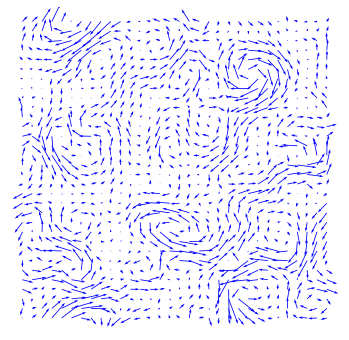

In [41]:
data_path = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
td = Turb2DDataset(data_path, ds=8, dt=1, time_idx=666)

print(td.t)
print(td.X.shape)
print(td.y.shape)
R = td.res

X = td.X
y = td.y
s = 1

plt.figure(figsize=(6,6))
plt.quiver(X[:,0].view(R,R)[::s,::s].detach(), 
           X[:,1].view(R,R)[::s,::s].detach(),
           y[:,0].view(R,R)[::s,::s].detach(),
           y[:,1].view(R,R)[::s,::s].detach(), scale=10, color='blue')
plt.axis('off')
plt.show()

6.66
torch.Size([16384, 2])
torch.Size([16384, 2])


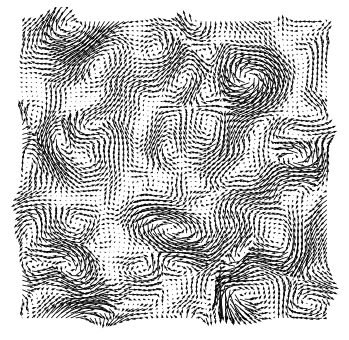

In [39]:
data_path = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
td = Turb2DDataset(data_path, ds=2, dt=1, time_idx=666)

print(td.t)
print(td.X.shape)
print(td.y.shape)
R = td.res

X = td.X
y = td.y
s = 2

plt.figure(figsize=(6,6))
plt.quiver(X[:,0].view(R,R)[::s,::s].detach(), 
           X[:,1].view(R,R)[::s,::s].detach(),
           y[:,0].view(R,R)[::s,::s].detach(),
           y[:,1].view(R,R)[::s,::s].detach(), scale=10)
plt.axis('off')
plt.show()

In [30]:
from turboflow.dataloaders import TurboFlowDataModule
td = TurboFlowDataModule('Turb2D',data_path,batch_size=10,time_idx=33,
                         train_downsampling=4, val_downsampling=4, test_downsampling=4,
                         num_workers=1)
td.setup(stage='fit')
X, y = td.train_dataset[:]
print(X.shape)

torch.Size([65536, 2])


In [32]:
X = td.X
y = td.y
H = td.res
s = 1

plt.figure(figsize=(6,6))
plt.quiver(X[:,0].view(H,H)[::s,::s].detach(), 
           X[:,1].view(H,H)[::s,::s].detach(),
           y[:,0].view(H,H)[::s,::s].detach(),
           y[:,1].view(H,H)[::s,::s].detach(), scale=10)
plt.axis('off')
plt.show()

AttributeError: 'TurboFlowDataModule' object has no attribute 'X'